In [1]:
# Regression with Abalone Dataset
# Anuar Konkashbaev
# School of Technology & Engineering, National University
# Course code: 7057984436
# Professor: Dr. Yavarimanesh
# December 2th, 2024
#

In [2]:
# Importing libraries
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# Small description
# Abalone dataset is a set describing a set of the individual oceanic molluscs
# Variable definition table
x=pd.read_csv("VariableDescription.csv")
print(x)

                            Name                    Data Type  \
Sex            nominal        --                            M   
Length         continuous     mm    Longest shell measurement   
Diameter       continuous     mm      perpendicular to length   
Height         continuous     mm           with meat in shell   
Whole weight   continuous  grams                whole abalone   
Whole weight.1 continuous  grams               weight of meat   
Whole weight.2 continuous  grams  gut weight (after bleeding)   
Shell weight   continuous  grams            after being dried   
Rings          integer        --  +1.5 gives the age in years   

                          Measurement Unit      Description  
Sex            nominal                   F   and I (infant)  
Length         continuous              NaN              NaN  
Diameter       continuous              NaN              NaN  
Height         continuous              NaN              NaN  
Whole weight   continuous              

In [4]:
# Loading datafiles
dftest=pd.read_csv("test.csv.zip",compression="zip")
dftest=dftest.rename(columns={"Whole weight":"Whole_weight","Whole weight.1":"Whole_weight.1","Whole weight.2":"Whole_weight.2","Shell weight":"Shell_weight"})
dftrain=pd.read_csv("train.csv.zip",compression="zip")
dftrain=dftrain.rename(columns={"Whole weight":"Whole_weight","Whole weight.1":"Whole_weight.1","Whole weight.2":"Whole_weight.2","Shell weight":"Shell_weight"})

In [5]:
# Dataset description
dftestDesc=dftest.describe()
print("Test set description\n",dftestDesc)
dftrainDesc=dftrain.describe()
print("\n\nTrain set description\n",dftrainDesc)
print("\n\nTest set info\n")
dftestInfo=dftest.info()
print("\n\nTrain set info\n")
dftrainInfo=dftrain.info()

Test set description
                   id        Length      Diameter        Height  Whole_weight  \
count   60411.000000  60411.000000  60411.000000  60411.000000  60411.000000   
mean   120820.000000      0.517428      0.401961      0.135751      0.790062   
std     17439.297893      0.117609      0.097470      0.038175      0.457591   
min     90615.000000      0.075000      0.055000      0.000000      0.002000   
25%    105717.500000      0.450000      0.345000      0.110000      0.419500   
50%    120820.000000      0.545000      0.425000      0.140000      0.801500   
75%    135922.500000      0.600000      0.470000      0.160000      1.070000   
max    151025.000000      0.800000      0.650000      1.095000      2.825500   

       Whole_weight.1  Whole_weight.2  Shell_weight  
count    60411.000000    60411.000000  60411.000000  
mean         0.341227        0.169419      0.226125  
std          0.204221        0.100720      0.129826  
min          0.001000        0.000500    

,Length,Diameter,Height,Whole_weight,Whole_weight.1,Whole_weight.2,Shell_weight,Rings
Length,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole_weight,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Whole_weight.1,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Whole_weight.2,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell_weight,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


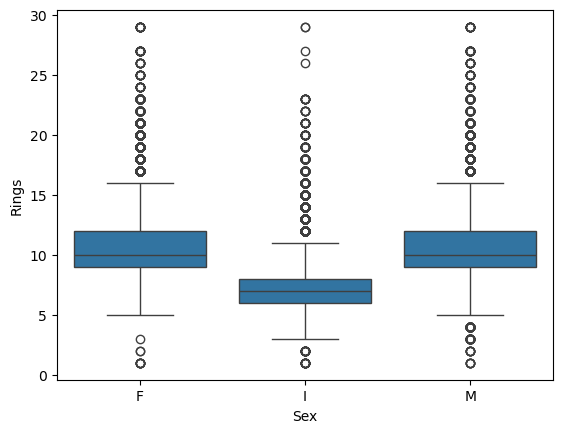

In [6]:
# Correlational analysis in training set
# Sex is an important contributor in most of the species
sns.boxplot(x="Sex",y="Rings",data=dftrain)
numerical_cols=["Length","Diameter","Height","Whole_weight","Whole_weight.1","Whole_weight.2","Shell_weight","Rings"]
X=dftrain[numerical_cols]
X.corr()

In [7]:
# As we can see from the correlaation matrix for numerical the correlations between "Rings" and the other variables range from 0.51 to 0.69, which is not a large range.
# On the other hand, in the "Sex" varible, male and female are practically the same in this dataset, but the "Infant" variable do have difference.
# Therefore, logistic regression will be in order to include "Sex" into considiration.
# I will create two models: one with "Sex" included and one where "Sex" is not included

In [21]:
# Logistic regression model 1 with "Sex" included
# I will take 5 variables with highest correlation and "Sex"
formula='Rings ~ Sex + Shell_weight + Height + Diameter + Length + Whole_weight'
mod=ols(formula,data=dftrain)
res=mod.fit()
print(res.summary())
mod2=ols(formula,data=dftrain).fit()
table=sm.stats.anova_lm(mod2)
print(table)
print("\n\nConfidence intervals")
print(mod2.conf_int())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                 1.607e+04
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:47:42   Log-Likelihood:            -1.9673e+05
No. Observations:               90615   AIC:                         3.935e+05
Df Residuals:                   90607   BIC:                         3.936e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.5785      0.064     71.282   

In [22]:
# Logistic regression model 2 with "Sex" excluded
# I will take 5 variables with highest correlation and "Sex"
formula='Rings ~ Shell_weight + Height + Diameter + Length + Whole_weight'
modNoSex=ols(formula,data=dftrain)
resNoSex=modNoSex.fit()
print(resNoSex.summary())
modNoSex2=ols(formula,data=dftrain).fit()
table=sm.stats.anova_lm(modNoSex2)
print(table)
print("\n\nConfidence intervals")
print(modNoSex2.conf_int())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                 2.181e+04
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:47:55   Log-Likelihood:            -1.9750e+05
No. Observations:               90615   AIC:                         3.950e+05
Df Residuals:                   90609   BIC:                         3.951e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.4313      0.057     60.161   

In [10]:
# The largest coeficient is for "Shell_weight" - 29.8200, and that makes sense since with age the thikness of the shell for most of the molluscs increases.
# The second largest is for "Height", which is normal for the same reasons as "Shell_weight"
# R-squared is just a little bit larger than for the model with "Sex" included, but F-statistic is much greater.  

In [11]:
# I am getting better F-statistic with the model without "Sex"

In [34]:
# Fitting model into test dataset
print("Formula is: ",modNoSex.formula)
dftest["Rings"]=resNoSex.predict(dftest)

Formula is:  Rings ~ Shell_weight + Height + Diameter + Length + Whole_weight


In [35]:
dftest[["id","Rings"]].to_csv("kaggle.regressionWithAnAbaloneDataset.noSex.csv")

In [17]:
# The best variable set is not always best choice (Hanke, et al.,2024) 

In [27]:
# predicting values
print("Formula is: ",mod.formula)
dftest["Rings"]=res.predict(dftest)

Formula is:  Rings ~ Sex + Shell_weight + Height + Diameter + Length + Whole_weight


In [29]:
dftest[["id","Rings"]].to_csv("kaggle.regressionWithAnAbaloneDataset.withSex.csv")

In [ ]:
# A more robust method for predicting age of mollusc is described in (Misman M et al., 2019), but I think neural networks are outside the scope of this excersise. 